In [1]:
import numpy as np
from tensorflow.python.client import device_lib

from tcn_sequence_models.data_processing.dataset import DataSet
from tcn_sequence_models.models import TCN_Seq2Seq
from tensorflow.keras.callbacks import EarlyStopping
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import os

2022-07-04 13:12:22.118868: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/home/michael/Projects/TCN_Seq2Seq/venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [2]:
#set config_path to any path on your system
config_path = "/home/michael/university_courses/lab_course/lab_group_michael_maciej" \
              "/model_configs/model_config_TCN_TCN_non_regressive"
os.makedirs(name=config_path, exist_ok=True)

In [3]:

device_lib.list_local_devices()

2022-07-04 13:12:24.251041: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-04 13:12:24.252728: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-07-04 13:12:24.312932: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:08:00.0 name: NVIDIA GeForce GTX 1070 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 15 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 238.66GiB/s
2022-07-04 13:12:24.312966: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-07-04 13:12:24.317264: I tensorflow/stream_executor/platform/default/dso_loa

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11664470071907048255,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7051083776
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3016485895429743225
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:08:00.0, compute capability: 6.1"]

22-07-04 13:12:24.758831: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2022-07-04 13:12:24.758838: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2022-07-04 13:12:24.760440: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1418] Created TensorFlow device (/device:GPU:0 with 6724 MB memory) -> physical GPU (device: 0, name: NVIDIA GeForce GTX 1070, pci bus id: 0000:08:00.0, compute capability: 6.1)


## Load and process data

In [4]:
data_path = "../data/all_months_small.xlsx"

In [5]:
df = pd.read_excel(data_path)
df['date / time']= pd.to_datetime(df['date / time'])

In [6]:
dataset = DataSet(df)

In [7]:
#dataset.load_data(data_path, file_type="xlsx")
df.columns

Index(['date / time', 'MeteoViva_Switch - MeteoViva active (Logging)',
       'MeteoViva_Switch - MeteoViva mixed active (Logging)',
       'MeteoViva_Switch - MeteoViva inactive (Logging)',
       'MeteoViva_Schalter - MeteoViva_aktiv (Logging)',
       'Internal load - Load profile persons (Load profile)',
       'Internal load - Load profile equipment (Load profile)',
       'Internal load - Load profile humidifiers (Load profile)',
       'Klimasensor - Mittlere_Zonentemperatur (Logging)',
       'Climate - Mittlere_Zonentemperatur (Forecast)',
       'Climate - Climate profile upper limit (Climate profile)',
       'Climate - Climate profile upper limit (Climate profile).1',
       'Climate - Climate profile lower limit (Climate profile)',
       'Klimasensor - Raumtemperatur_K3_EG (Logging)',
       'Klimasensor - Raumtemperatur_K4_EG (Logging)',
       'Klimasensor - Raumtemperatur_K6_EG (Logging)',
       'Klimasensor - Raumtemperatur_K3_OG2 (Logging)',
       'Klimasensor - Ra

In [8]:
df['MeteoViva_Switch - MeteoViva active (Logging)'] = df['MeteoViva_Switch - ' \
                                                         'MeteoViva active (Logging)' \
                                                         ''].astype('str')

In [9]:
features_input_encoder = [
    "Weather - Outdoor temperature (Logging)",
    "Internal load - Load profile persons (Load profile)",
    "Heizkreis_Heizkoerper - Vorlauftemperatur (Logging)",
]

features_input_decoder = [
    "Weather - Outdoor temperature (Forecast)",
]

feature_target = "Heizkreis_Heizkoerper - Vorlauftemperatur (Forecast)"

time_col = 'date / time'

In [10]:
split_ratio = 0.80579
input_seq_len = 50
output_seq_len = 20
smoothing_operations = None
temporal_encoding_modes = ["seasons", "weekdays", "hours"]
autoregressive = True


In [11]:
# split_date = datetime.date(2019, 1, 1)
dataset.process(
    features_input_encoder,
                features_input_decoder,
                feature_target,
                input_seq_len,
                output_seq_len,
                model_type="tcn_tcn",
                           time_col=time_col,
                split_ratio = split_ratio,
                split_date = None,
                temporal_encoding_modes=temporal_encoding_modes,
                autoregressiive=autoregressive,
                )

seasons
weekdays
hours


In [12]:
considered_months = None
X_train, y_train, X_val, y_val = dataset.train_test_split(split_ratio)

# You can also split by split_ratio
#X_train, y_train, X_val, y_val = dataset.train_test_split(split_ratio)

## Create model and fit it

In [13]:
from tensorflow.keras.optimizers import Adam

model = TCN_Seq2Seq(
        )

model.build(
    num_layers_tcn = None,
    num_filters = 6,
    kernel_size = 9,
    dilation_base = 2,
    dropout_rate = 0.2,
    key_size = 6,
    value_size = 6,
    num_attention_heads = 2,
    neurons_output = [16],
    activation = "relu",
    kernel_initializer = "he_normal",
    batch_norm_tcn = True,
    layer_norm_tcn = False,
    autoregressive=autoregressive)
model.compile(optimizer=Adam(lr=0.003, decay=1e-3))


2022-07-04 13:12:30.717229: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:08:00.0 name: NVIDIA GeForce GTX 1070 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 15 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 238.66GiB/s
2022-07-04 13:12:30.718604: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2022-07-04 13:12:30.719596: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:08:00.0 name: NVIDIA GeForce GTX 1070 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 15 deviceMemorySize: 7.93GiB deviceMemoryBandwidth: 238.66GiB/s
2022-07-04 13:12:30.720938: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2022-07-04 13:12:30.720976: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-07-04 13:12:30.720983: I tensorflow/

In [14]:
cb_early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
model.fit(X_train,
          y_train,
          (X_val, y_val),
          epochs=1,
          batch_size=64,
          callbacks = cb_early_stopping
          )

2022-07-04 13:12:30.856396: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-04 13:12:30.876300: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3193490000 Hz
2022-07-04 13:12:36.634886: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-07-04 13:12:37.028183: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8202
2022-07-04 13:12:37.529005: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-04 13:12:37.529042: W tensorflow/stream_executor/gpu/asm_compiler.cc:56] Couldn't invoke ptxas --version
2022-07-04 13:12:37.529562: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-04 13:12:37.529621: W tensorflow/stream_executor/gpu/redzone_allocator.cc:31

72/72 [==============================] - 21s 188ms/step - loss: 1.2025 - val_loss: 2.0663


In [15]:
model.model.summary()

Model: "tcn__seq2seq"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Encoder)            multiple                  2832      
_________________________________________________________________
decoder (Decoder)            multiple                  3529      
Total params: 6,361
Trainable params: 6,169
Non-trainable params: 192
_________________________________________________________________


## Run bayessian optimizer to find the optimal hyperparameters
Uncomment if you want to try it

In [16]:
save_path = config_path
model.save_model(save_path)

In [17]:
dataset.save_dataset_config(save_path=config_path)

In [19]:
dataset_loaded = DataSet(df)
dataset_loaded.load_dataset_config(load_path=config_path)

In [20]:
dataset_loaded.process_from_config_inference(input_seq_len=50, output_seq_len=20,
                                             )

In [21]:
model_loaded = TCN_Seq2Seq()

In [22]:
model_loaded.load_model(config_path, dataset_loaded.X[:3], is_training_data=False)

1
2
3
4
5


In [52]:
y_pred = model_loaded.predict(dataset_loaded.X[:3])

inference call


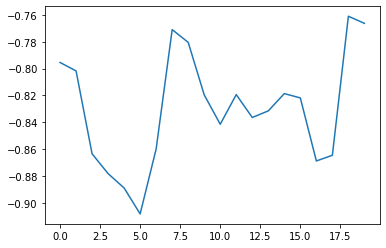

In [58]:
plt.plot(y_pred[400])

In [ ]:

model.parameter_search(
        X_train,
        y_train,
        X_val,
        y_val,
        batch_size = 64,
        results_path = "param_search_new/search_13",
        patience=5,
        loss = "mse",
        max_trials = 100,
        executions_per_trial = 1,
        num_filters = [4, 6, 8],
        neurons_output = [16],
        kernel_size = [5, 9, 13, 17],
        dilation_base = [2],
        dropout_rate = [0.1, 0.2, 0.3],
        key_value_size = [4, 6, 8],
        num_attention_heads = [1, 2],
        activation = ["elu"],
        kernel_initializer = ["he_normal"],
        batch_norm_tcn = [False],
        layer_norm_tcn = [True],
        padding_encoder = ['same', 'causal']
    )


## evaluate the model

In [ ]:
X_val

In [ ]:
# evaluate train and val set with scaling
#score_train = model.eval(X_train, y_train, dataset.scaler_y, iterations=1)
#print(f"score train: {score_train}")
score_val = model.eval(X_val, y_val, dataset.scaler_y, iterations=1)
print(f"score val: {score_val}")

In [ ]:
# evaluate train and val set without scaling
score_val = model.eval(X_val, y_val, iterations=1)
print(f"score val: {score_val}")


## Save model if you want to

In [96]:
# save model
save_path = config_path
model.save_model(save_path)


## Prepare data for plotting

In [ ]:
dataset.df_raw.dtypes

In [186]:
X_train, y_train, X_val, y_val = dataset.train_test_split(split_ratio=0.95)


In [187]:
X_train_val = X_train[:2] + [X_train[-1]]

In [59]:
# Make predictions for whole dataset
#dataset.scaler_y
preds_train = model.predict(X_val, scaler = None, iterations=1)
preds_train_flat = preds_train.reshape(preds_train.shape[0], -1)

In [208]:
# Make predictions for whole dataset
#dataset.scaler_y
preds_val = model.predict(X_val, scaler = None, iterations=1)
preds_val_flat = preds_val.reshape(preds_val.shape[0], -1)

data_decoder_curr: Tensor("tcn__seq2seq_5/decoder/concat:0", shape=(None, 1, 3), dtype=float32)
i:0
out: (None, 1, 1)
data_decoder_curr: Tensor("tcn__seq2seq_5/decoder/concat_3:0", shape=(None, 2, 3), dtype=float32)
i:1
out: (None, 2, 1)
data_decoder_curr: Tensor("tcn__seq2seq_5/decoder/concat_7:0", shape=(None, 3, 3), dtype=float32)
i:2
out: (None, 3, 1)
data_decoder_curr: Tensor("tcn__seq2seq_5/decoder/concat_11:0", shape=(None, 4, 3), dtype=float32)
i:3
out: (None, 4, 1)
data_decoder_curr: Tensor("tcn__seq2seq_5/decoder/concat_15:0", shape=(None, 5, 3), dtype=float32)
i:4
out: (None, 5, 1)
data_decoder_curr: Tensor("tcn__seq2seq_5/decoder/concat_19:0", shape=(None, 6, 3), dtype=float32)
i:5
out: (None, 6, 1)
data_decoder_curr: Tensor("tcn__seq2seq_5/decoder/concat_23:0", shape=(None, 7, 3), dtype=float32)
i:6
out: (None, 7, 1)
data_decoder_curr: Tensor("tcn__seq2seq_5/decoder/concat_27:0", shape=(None, 8, 3), dtype=float32)
i:7
out: (None, 8, 1)
data_decoder_curr: Tensor("tcn__seq2s

In [67]:
preds_train.shape

(19189, 192, 1)

In [61]:
preds_val_last = preds_train[:,-1]

In [62]:
preds_val_last

array([[ 1.0503411],
       [ 1.3489884],
       [ 1.3182067],
       ...,
       [-0.7257966],
       [-0.7393407],
       [-0.6734592]], dtype=float32)

In [73]:
val_last = y_val[:,-1]
val_last

array([ 2.52595602,  2.52595602,  1.45201285, ..., -0.670752  ,
       -0.670752  , -0.670752  ])

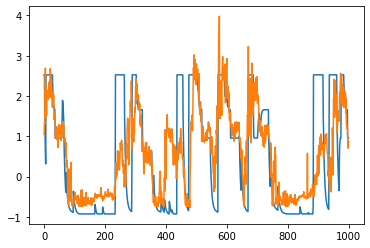

In [75]:
plt.plot(val_last[:1000])
plt.plot(preds_val_last[: 1000])

plt.show()

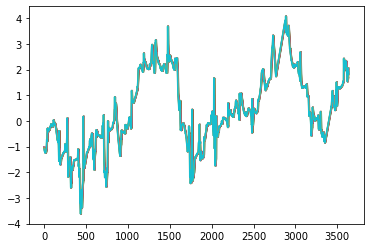

In [121]:
plt.plot(y_val)

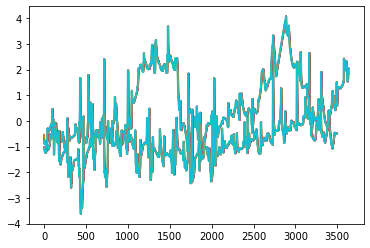

In [124]:
plt.plot(y_train[7000:10500])
plt.plot(y_val)
plt.show()

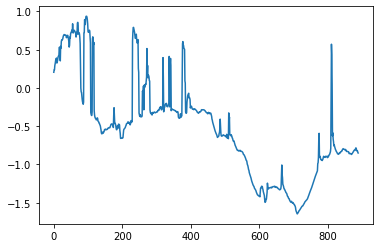

In [77]:
plt.plot(preds_val_last)
plt.show()

data_decoder_curr: Tensor("tcn__seq2seq_1/decoder/concat:0", shape=(None, 1, 1), dtype=float32)
i:0
out: (None, 1, 1)
data_decoder_curr: Tensor("tcn__seq2seq_1/decoder/concat_3:0", shape=(None, 2, 1), dtype=float32)
i:1
out: (None, 2, 1)
data_decoder_curr: Tensor("tcn__seq2seq_1/decoder/concat_7:0", shape=(None, 3, 1), dtype=float32)
i:2
out: (None, 3, 1)
data_decoder_curr: Tensor("tcn__seq2seq_1/decoder/concat_11:0", shape=(None, 4, 1), dtype=float32)
i:3
out: (None, 4, 1)
data_decoder_curr: Tensor("tcn__seq2seq_1/decoder/concat_15:0", shape=(None, 5, 1), dtype=float32)
i:4
out: (None, 5, 1)
data_decoder_curr: Tensor("tcn__seq2seq_1/decoder/concat_19:0", shape=(None, 6, 1), dtype=float32)
i:5
out: (None, 6, 1)
data_decoder_curr: Tensor("tcn__seq2seq_1/decoder/concat_23:0", shape=(None, 7, 1), dtype=float32)
i:6
out: (None, 7, 1)
data_decoder_curr: Tensor("tcn__seq2seq_1/decoder/concat_27:0", shape=(None, 8, 1), dtype=float32)
i:7
out: (None, 8, 1)
data_decoder_curr: Tensor("tcn__seq2s

In [37]:
preds_val_flat.shape

(4791, 10)

In [29]:
import numpy as np

In [31]:
preds_flat = np.concatenate([preds_train_flat, preds_val_flat], axis=0)

In [32]:
preds_flat

array([[ 0.39382395,  0.33453423,  0.21719849, ...,  0.52029306,
         0.60675275,  0.794297  ],
       [ 0.40208897,  0.3362477 ,  0.22351271, ...,  0.54986686,
         0.62202126,  0.80514824],
       [ 0.40442953,  0.33243692,  0.22391799, ...,  0.56048536,
         0.6243517 ,  0.8107691 ],
       ...,
       [-0.23788075, -0.31114438, -0.41667798, ..., -0.39237538,
        -0.31796315, -0.35625377],
       [-0.24272786, -0.3382323 , -0.4231496 , ..., -0.4401516 ,
        -0.34404555, -0.37639746],
       [-0.2463454 , -0.35520113, -0.43111232, ..., -0.4514646 ,
        -0.35495752, -0.37877694]], dtype=float32)

In [41]:
X_train, y_train, X_val, y_val = dataset.train_test_split(0.5)

In [44]:
X_val[0].shape

(2291, 200, 5)

In [24]:
X_train = X_train[:2] + [X_train[-1]]
X_val = X_val[:2] + [X_val[-1]]

In [ ]:
X_train = X_train

In [45]:
# Create dataset with predictions
df_with_preds = dataset.create_dataframe_with_predictions(preds_flat,
                                                          date_time_column=time_col)

ValueError: Length of values (9581) does not match length of index (5000)

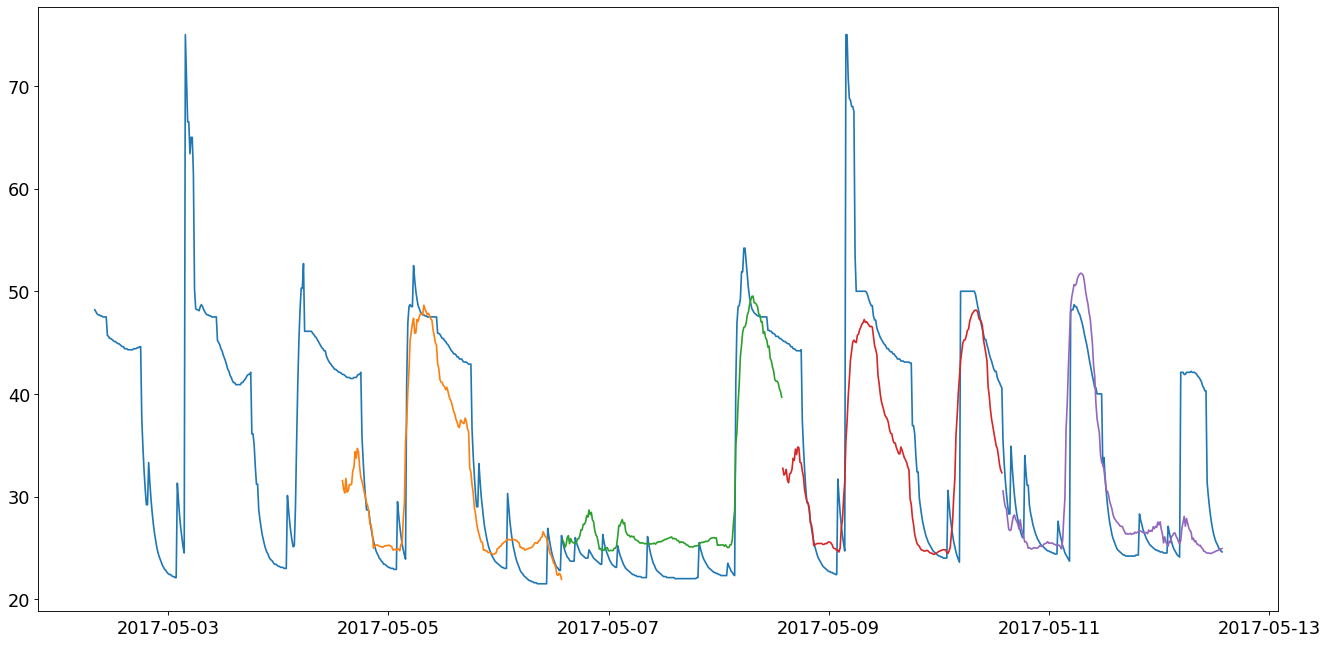

In [17]:
df_chunk = df_with_preds[20000:20984]
preds_last_0 = df_chunk[["date / time", "predictions"]][-768:-767]
preds_last_1 = df_chunk[["date / time", "predictions"]][-576:-575]
preds_last_2 = df_chunk[["date / time", "predictions"]][-384:-383]
preds_last_3 = df_chunk[["date / time", "predictions"]][-192:-191]
figure(figsize=(20, 10), dpi=80)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df_chunk["date / time"], df_chunk["target"])
plt.plot(df_chunk["date / time"][-768:-576],preds_last_0["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-576:-384],preds_last_1["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-384:-192],preds_last_2["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-192:],preds_last_3["predictions"].values[0] )

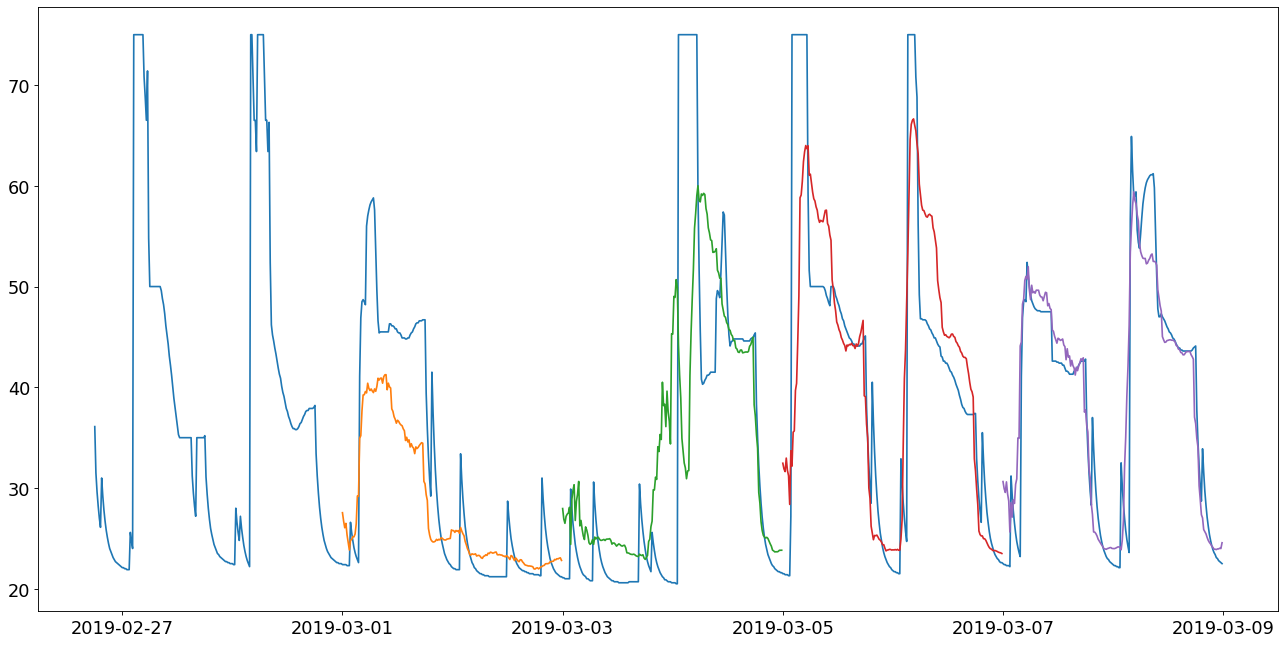

In [18]:
df_chunk = df_with_preds[83500:84484]
preds_last_0 = df_chunk[["date / time", "predictions"]][-768:-767]
preds_last_1 = df_chunk[["date / time", "predictions"]][-576:-575]
preds_last_2 = df_chunk[["date / time", "predictions"]][-384:-383]
preds_last_3 = df_chunk[["date / time", "predictions"]][-192:-191]
figure(figsize=(20, 10), dpi=80)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df_chunk["date / time"], df_chunk["target"])
plt.plot(df_chunk["date / time"][-768:-576],preds_last_0["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-576:-384],preds_last_1["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-384:-192],preds_last_2["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-192:],preds_last_3["predictions"].values[0] )


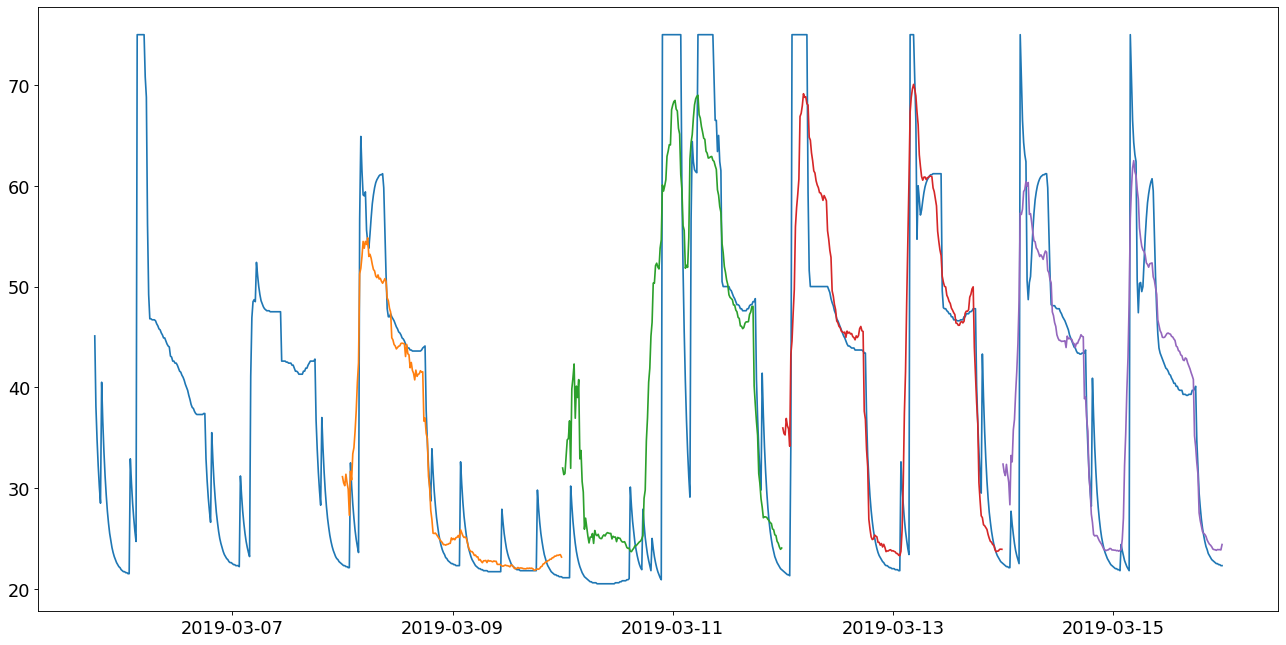

In [19]:
df_chunk = df_with_preds[84172:85156]
preds_last_0 = df_chunk[["date / time", "predictions"]][-768:-767]
preds_last_1 = df_chunk[["date / time", "predictions"]][-576:-575]
preds_last_2 = df_chunk[["date / time", "predictions"]][-384:-383]
preds_last_3 = df_chunk[["date / time", "predictions"]][-192:-191]
figure(figsize=(20, 10), dpi=80)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df_chunk["date / time"], df_chunk["target"])
plt.plot(df_chunk["date / time"][-768:-576],preds_last_0["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-576:-384],preds_last_1["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-384:-192],preds_last_2["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-192:],preds_last_3["predictions"].values[0] )

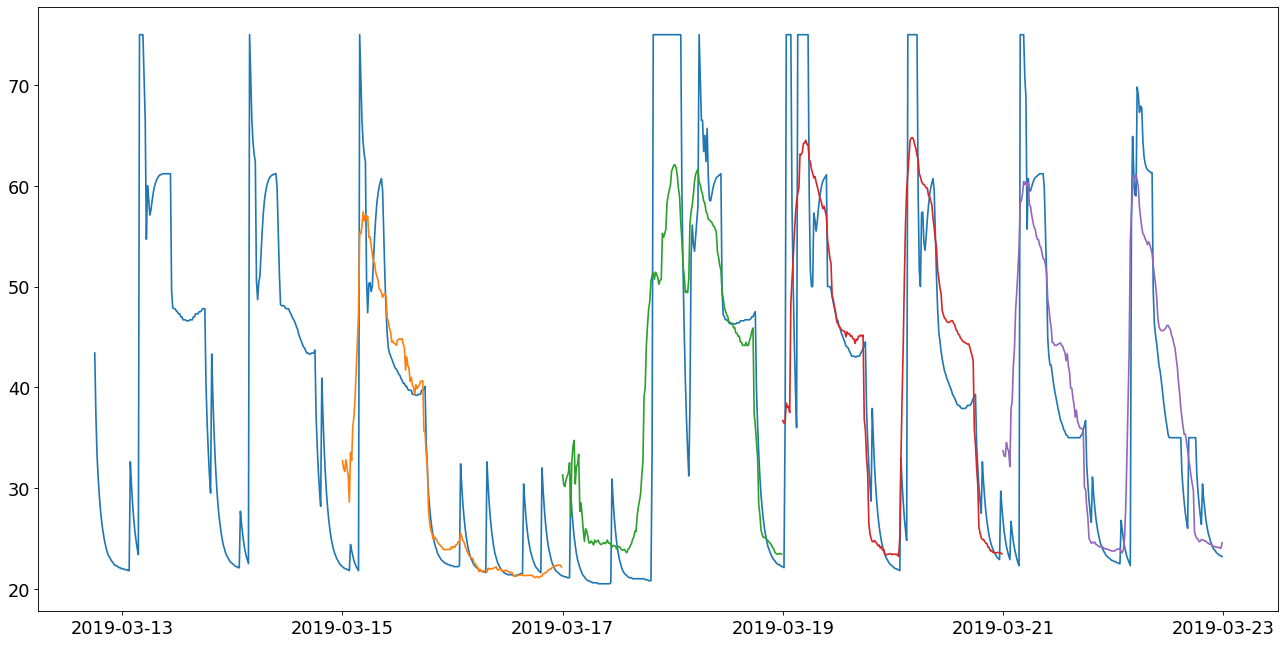

In [20]:
df_chunk = df_with_preds[84844:85828]
preds_last_0 = df_chunk[["date / time", "predictions"]][-768:-767]
preds_last_1 = df_chunk[["date / time", "predictions"]][-576:-575]
preds_last_2 = df_chunk[["date / time", "predictions"]][-384:-383]
preds_last_3 = df_chunk[["date / time", "predictions"]][-192:-191]
figure(figsize=(20, 10), dpi=80)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df_chunk["date / time"], df_chunk["target"])
plt.plot(df_chunk["date / time"][-768:-576],preds_last_0["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-576:-384],preds_last_1["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-384:-192],preds_last_2["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-192:],preds_last_3["predictions"].values[0] )

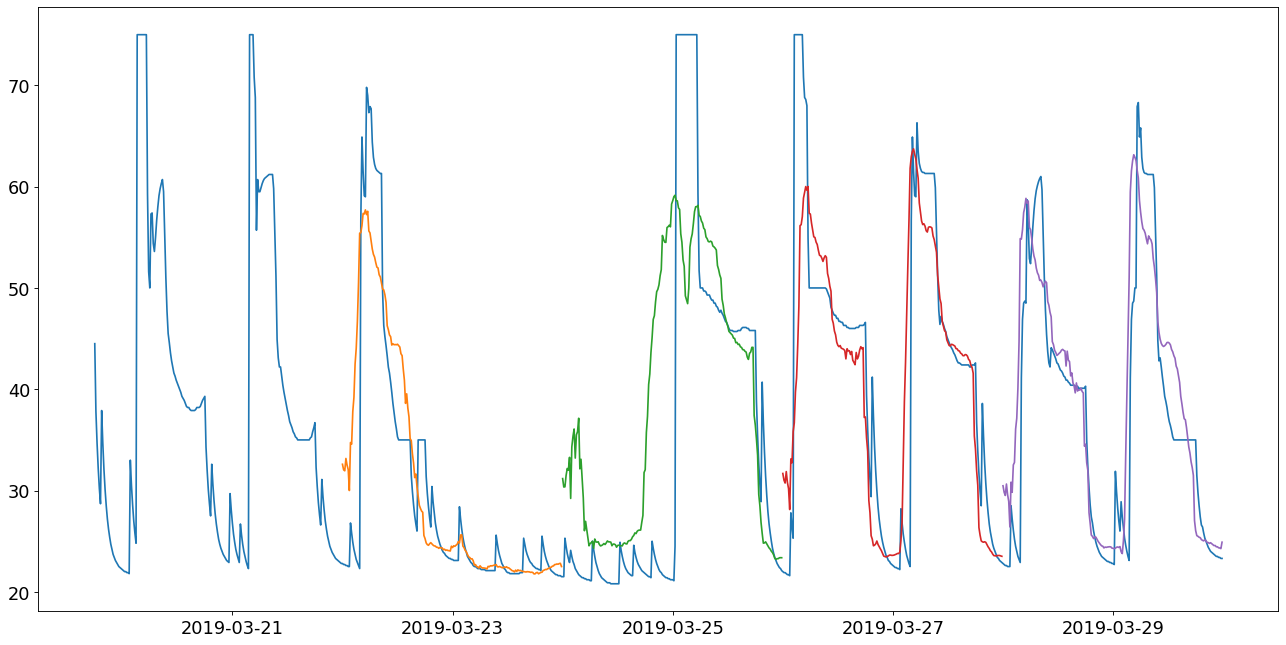

In [21]:
df_chunk = df_with_preds[85516:86500]
preds_last_0 = df_chunk[["date / time", "predictions"]][-768:-767]
preds_last_1 = df_chunk[["date / time", "predictions"]][-576:-575]
preds_last_2 = df_chunk[["date / time", "predictions"]][-384:-383]
preds_last_3 = df_chunk[["date / time", "predictions"]][-192:-191]
figure(figsize=(20, 10), dpi=80)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df_chunk["date / time"], df_chunk["target"])
plt.plot(df_chunk["date / time"][-768:-576],preds_last_0["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-576:-384],preds_last_1["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-384:-192],preds_last_2["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-192:],preds_last_3["predictions"].values[0] )

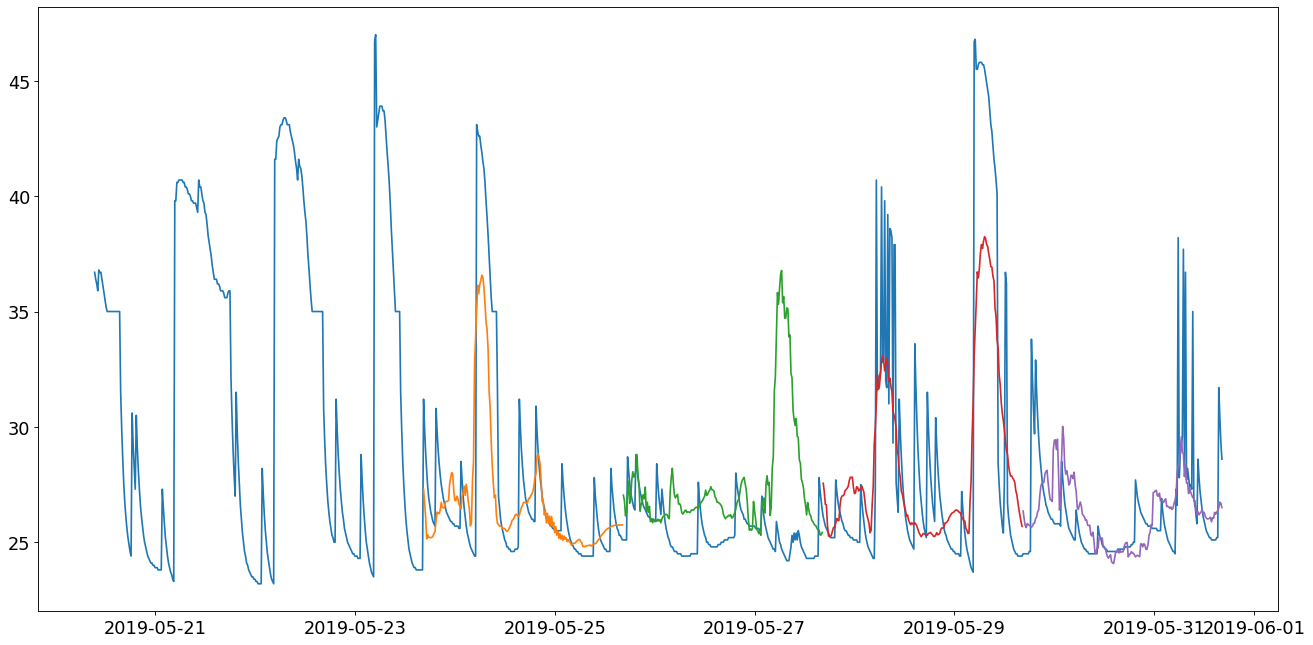

In [22]:
df_chunk = df_with_preds[91430:92514]
preds_last_0 = df_chunk[["date / time", "predictions"]][-768:-767]
preds_last_1 = df_chunk[["date / time", "predictions"]][-576:-575]
preds_last_2 = df_chunk[["date / time", "predictions"]][-384:-383]
preds_last_3 = df_chunk[["date / time", "predictions"]][-192:-191]
figure(figsize=(20, 10), dpi=80)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df_chunk["date / time"], df_chunk["target"])
plt.plot(df_chunk["date / time"][-768:-576],preds_last_0["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-576:-384],preds_last_1["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-384:-192],preds_last_2["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-192:],preds_last_3["predictions"].values[0] )

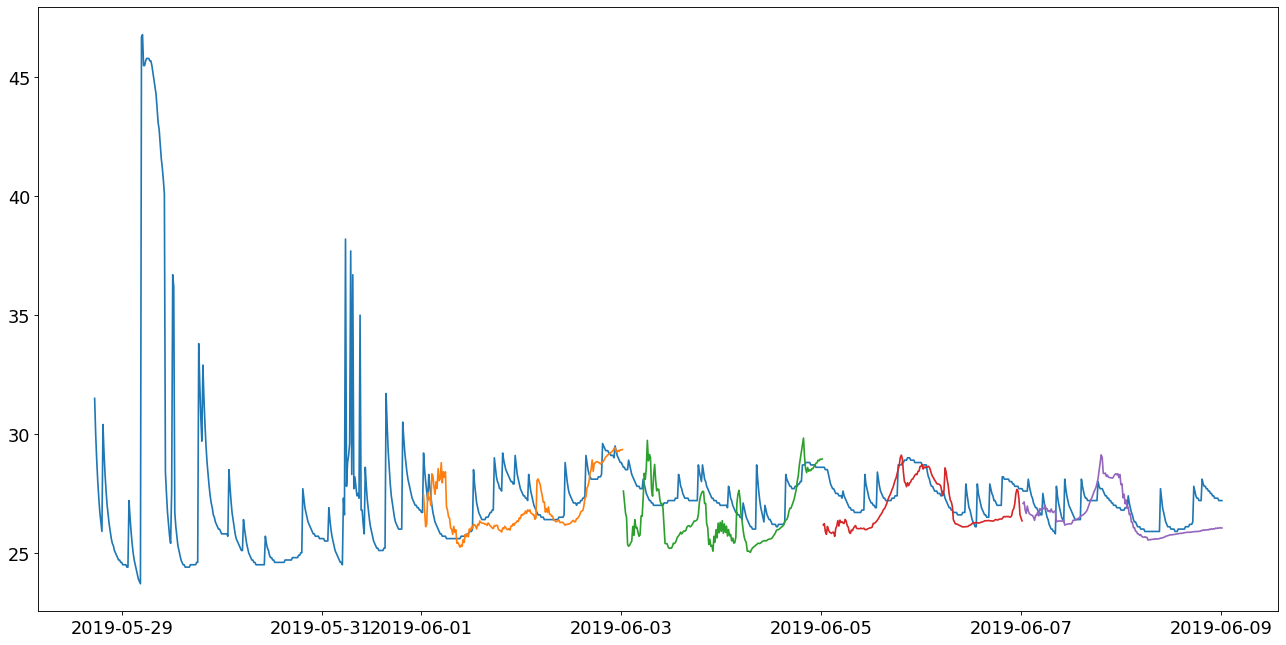

In [23]:
df_chunk = df_with_preds[92230:93314]
preds_last_0 = df_chunk[["date / time", "predictions"]][-768:-767]
preds_last_1 = df_chunk[["date / time", "predictions"]][-576:-575]
preds_last_2 = df_chunk[["date / time", "predictions"]][-384:-383]
preds_last_3 = df_chunk[["date / time", "predictions"]][-192:-191]
figure(figsize=(20, 10), dpi=80)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df_chunk["date / time"], df_chunk["target"])
plt.plot(df_chunk["date / time"][-768:-576],preds_last_0["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-576:-384],preds_last_1["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-384:-192],preds_last_2["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-192:],preds_last_3["predictions"].values[0] )

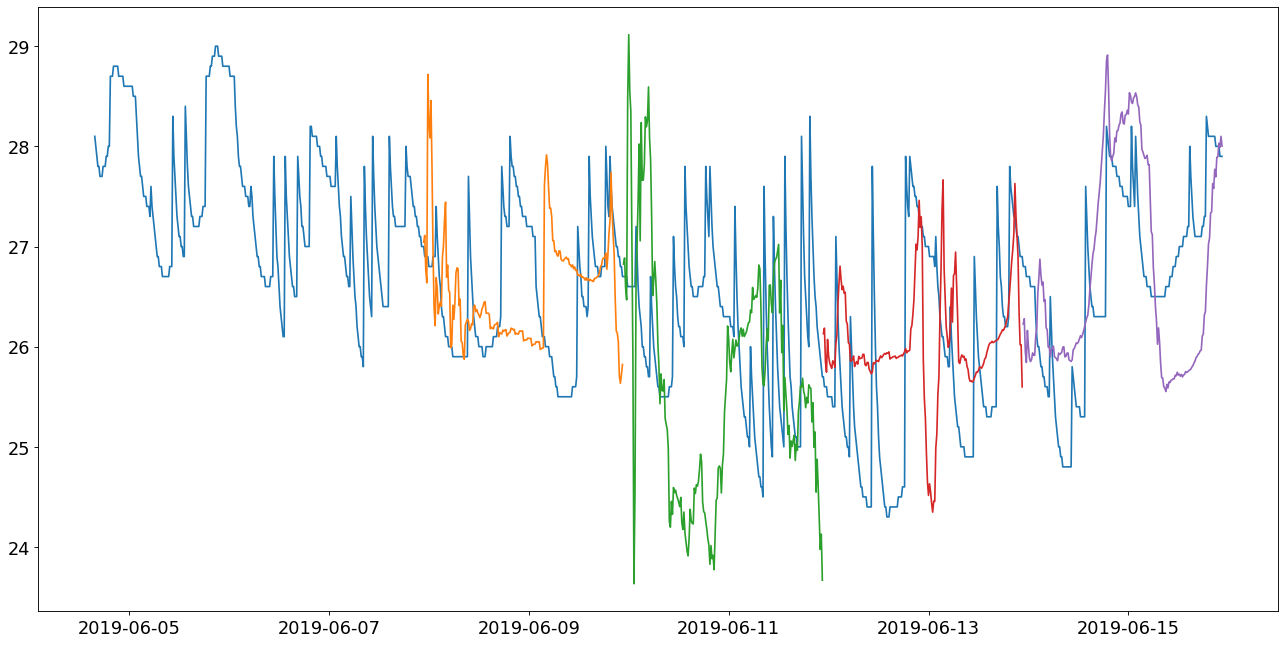

In [24]:
df_chunk = df_with_preds[92895:93979]
preds_last_0 = df_chunk[["date / time", "predictions"]][-768:-767]
preds_last_1 = df_chunk[["date / time", "predictions"]][-576:-575]
preds_last_2 = df_chunk[["date / time", "predictions"]][-384:-383]
preds_last_3 = df_chunk[["date / time", "predictions"]][-192:-191]
figure(figsize=(20, 10), dpi=80)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df_chunk["date / time"], df_chunk["target"])
plt.plot(df_chunk["date / time"][-768:-576],preds_last_0["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-576:-384],preds_last_1["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-384:-192],preds_last_2["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-192:],preds_last_3["predictions"].values[0] )

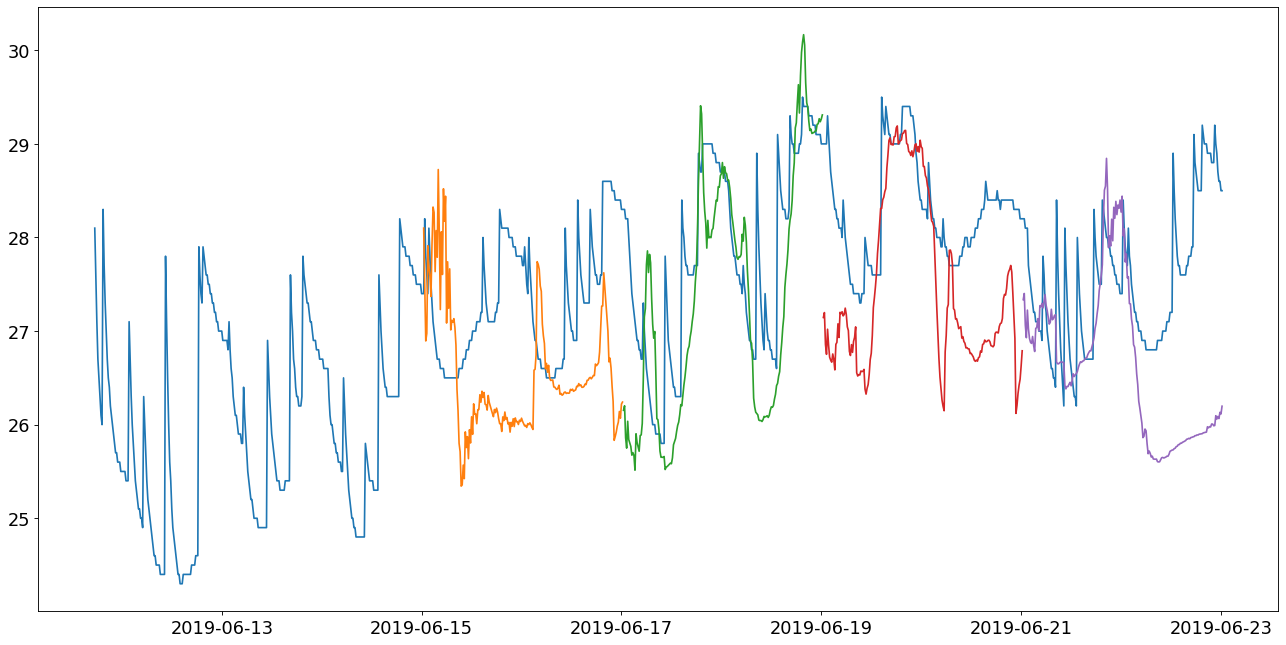

In [25]:
df_chunk = df_with_preds[93574:94658]
preds_last_0 = df_chunk[["date / time", "predictions"]][-768:-767]
preds_last_1 = df_chunk[["date / time", "predictions"]][-576:-575]
preds_last_2 = df_chunk[["date / time", "predictions"]][-384:-383]
preds_last_3 = df_chunk[["date / time", "predictions"]][-192:-191]
figure(figsize=(20, 10), dpi=80)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df_chunk["date / time"], df_chunk["target"])
plt.plot(df_chunk["date / time"][-768:-576],preds_last_0["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-576:-384],preds_last_1["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-384:-192],preds_last_2["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-192:],preds_last_3["predictions"].values[0] )

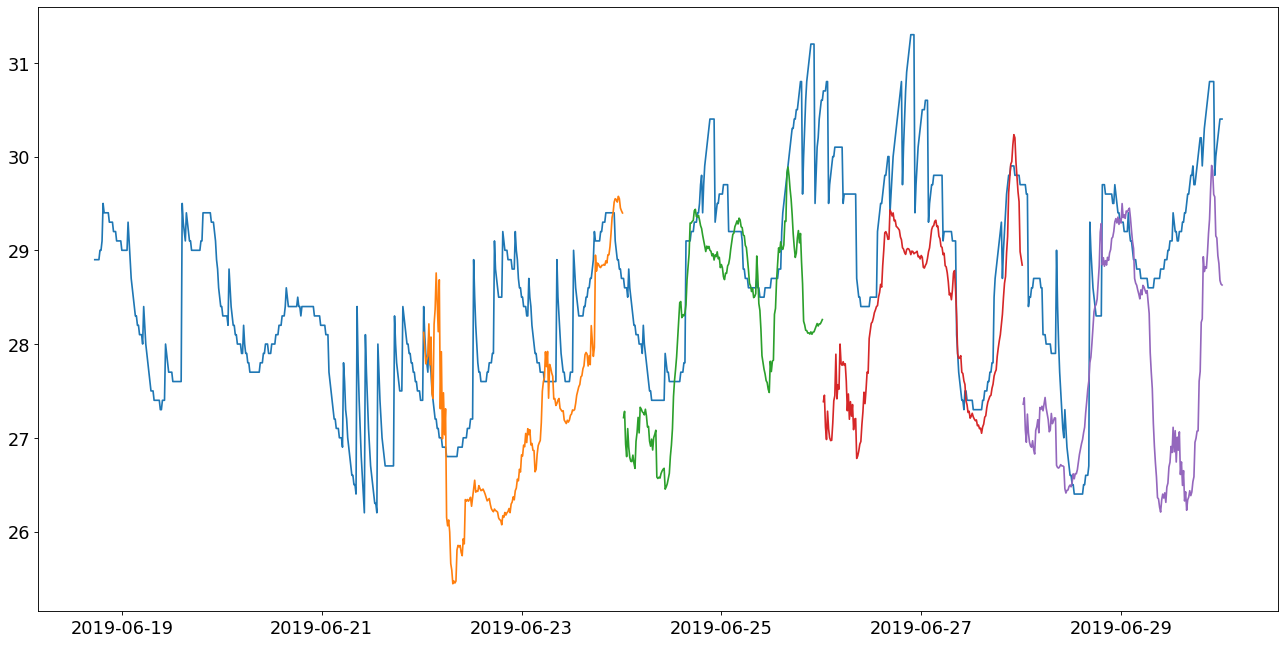

In [26]:
df_chunk = df_with_preds[94246:95330]
preds_last_0 = df_chunk[["date / time", "predictions"]][-768:-767]
preds_last_1 = df_chunk[["date / time", "predictions"]][-576:-575]
preds_last_2 = df_chunk[["date / time", "predictions"]][-384:-383]
preds_last_3 = df_chunk[["date / time", "predictions"]][-192:-191]
figure(figsize=(20, 10), dpi=80)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.plot(df_chunk["date / time"], df_chunk["target"])
plt.plot(df_chunk["date / time"][-768:-576],preds_last_0["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-576:-384],preds_last_1["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-384:-192],preds_last_2["predictions"].values[0] )
plt.plot(df_chunk["date / time"][-192:],preds_last_3["predictions"].values[0] )

## Demo on how to load saved models and dataset configs


In [6]:
# create dataset and model from saved configs
dataset_loaded = DataSet(df)
#dataset_loaded.load_data(data_path, file_type="xlsx")

In [7]:
dataset_loaded.load_dataset_config(config_path)

In [8]:
dataset_loaded.process_from_config_inference\
    (input_seq_len=700,
     output_seq_len=192)

In [13]:
model = TCN_Seq2Seq()
X_call = []
for el in dataset_loaded.X:
    X_call.append(el[:2])
model.load_model(config_path,
                        X_call, is_training_data=False)

1
2
3


2022-07-04 12:10:43.891532: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-04 12:10:48.356083: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3193490000 Hz
2022-07-04 12:13:45.213771: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-07-04 12:13:46.297033: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8202
2022-07-04 12:13:47.508899: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-04 12:13:47.508974: W tensorflow/stream_executor/gpu/asm_compiler.cc:56] Couldn't invoke ptxas --version
2022-07-04 12:13:47.509649: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-04 12:13:47.509767: W tensorflow/stream_executor/gpu/redzone_allocator.cc:31

4
5


ValueError: Layer #0 (named "encoder_1" in the current model) was found to correspond to layer encoder in the save file. However the new layer encoder_1 expects 74 weights, but the saved weights have 72 elements.

In [ ]:
model.predict(dataset.X)

In [32]:
considered_months = [1, 2, 3, 4, 5, 6, 7,]
X_train, y_train, X_val, y_val = dataset.train_test_split_date(split_date,
                                                               considered_months=considered_months)


In [33]:
# evaluate train and val set without scaling
score_train = model.eval(X_train, y_train, iterations=1)
print(f"score train: {score_train}")
score_val = model.eval(X_val, y_val, iterations=1)
print(f"score val: {score_val}")

score train: 0.18007818622796817
score val: 0.2168974734364405


In [34]:
# evaluate train and val set with scaling
score_train = model.eval(X_train, y_train,dataset_loaded.scaler_y, iterations=1)
print(f"score train: {score_train}")
score_val = model.eval(X_val, y_val, dataset_loaded.scaler_y, iterations=1)
print(f"score val: {score_val}")

score train: 46.402239555828515
score val: 55.88977065051995


In [41]:
import tensorflow as tf

In [42]:
t = tf.constant([[[],[]],[[],[]]], dtype=float)
t2 = tf.constant([[2],[3]], dtype=float)

In [45]:
tf.expand_dims(t2, axis=1)

<tf.Tensor: shape=(2, 1, 1), dtype=float32, numpy=
array([[[2.]],

       [[3.]]], dtype=float32)>

In [31]:
t.shape

TensorShape([2, 2, 0])

In [33]:
tf.concat([t[:,:1,:],t2], axis=-1)

<tf.Tensor: shape=(2, 1, 1), dtype=float32, numpy=
array([[[1.]],

       [[2.]]], dtype=float32)>

In [40]:
t2[:,1:2,:]

<tf.Tensor: shape=(2, 1, 1), dtype=float32, numpy=
array([[[2.]],

       [[3.]]], dtype=float32)>

In [21]:
t2

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[1],
       [2]])>